## __LAB - 05__
#### End-to-End Classification Pipeline
__The Challenge:__ Predicting Telecom Customer Churn

I am using a synthetic dataset named telecom_churn.csv that has the said columns with nan values in many of them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we will import the csv file

In [2]:
tele_data = pd.read_csv('./telecom_churn.csv')
tele_data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No,2021-10-26
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,2022-04-03
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,2021-05-03
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,2021-08-18
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,2022-02-17


In [3]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
 11  Timestamp        81757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 9.2+ MB


In [4]:
tele_data.isna().sum()

CustomerID             0
Gender             18213
SeniorCitizen      18139
Partner            18006
Dependents         17997
Tenure             17999
PhoneService       17904
InternetService    18421
MonthlyCharges     18096
TotalCharges       19743
Churn                  0
Timestamp          18243
dtype: int64

First, I drop the CustomerID and Timestamp as they are not important for our classification.

In [5]:
tele_data.drop(['CustomerID', 'Timestamp'], axis=1, inplace=True)

In [6]:
tele_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No
1,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes
2,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes
3,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No
4,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No


In [7]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Gender           81787 non-null   object 
 1   SeniorCitizen    81861 non-null   float64
 2   Partner          81994 non-null   object 
 3   Dependents       82003 non-null   object 
 4   Tenure           82001 non-null   float64
 5   PhoneService     82096 non-null   object 
 6   InternetService  81579 non-null   object 
 7   MonthlyCharges   81904 non-null   float64
 8   TotalCharges     80257 non-null   object 
 9   Churn            100000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 7.6+ MB


In [8]:
tele_data.isna().sum()

Gender             18213
SeniorCitizen      18139
Partner            18006
Dependents         17997
Tenure             17999
PhoneService       17904
InternetService    18421
MonthlyCharges     18096
TotalCharges       19743
Churn                  0
dtype: int64

Now, we see that ~20000 of the data are missing in each column. So, we will have to impute them later in our pipeline.

We also need to convert TotalCharges into numeric, we will use to_numeric method of pandas to convert it into numeric type and fill any errorneous values with NaN.

In [9]:
tele_data['TotalCharges'] = pd.to_numeric(tele_data['TotalCharges'], errors='coerce')

Now, TotalCharges is also converted to numeric

In [10]:
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Gender           81787 non-null   object 
 1   SeniorCitizen    81861 non-null   float64
 2   Partner          81994 non-null   object 
 3   Dependents       82003 non-null   object 
 4   Tenure           82001 non-null   float64
 5   PhoneService     82096 non-null   object 
 6   InternetService  81579 non-null   object 
 7   MonthlyCharges   81904 non-null   float64
 8   TotalCharges     79409 non-null   float64
 9   Churn            100000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 7.6+ MB


In [11]:
numeric_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
target = ['Churn']

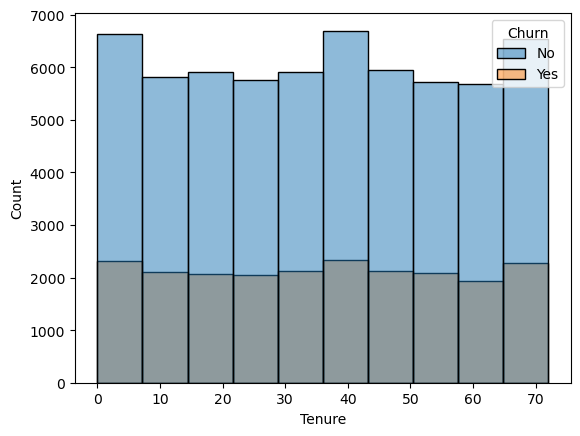

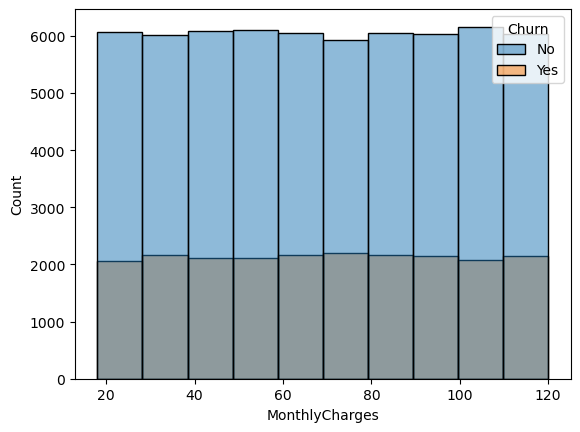

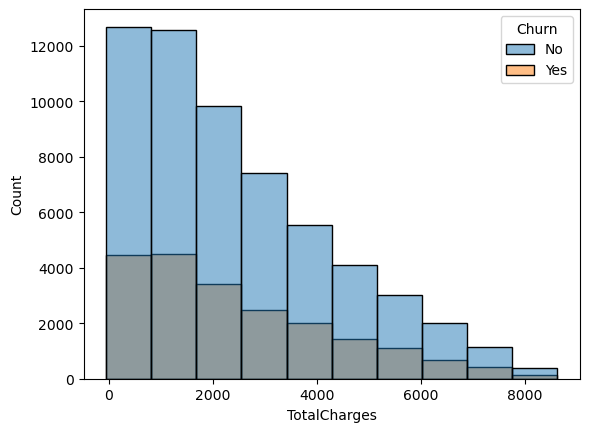

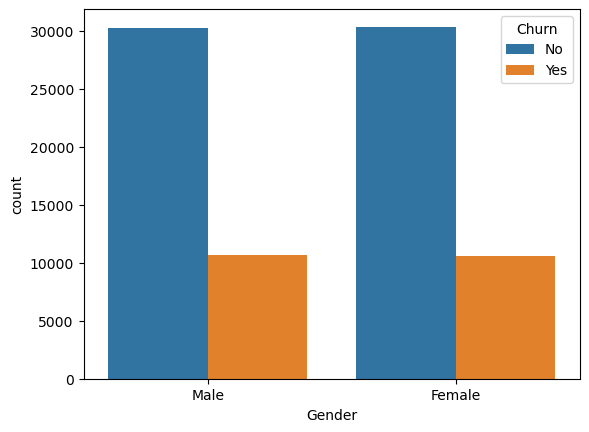

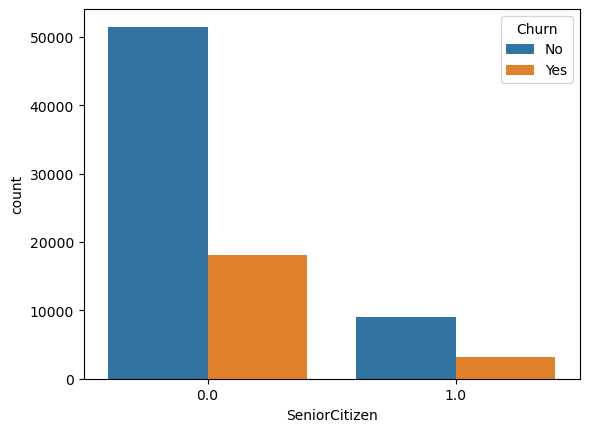

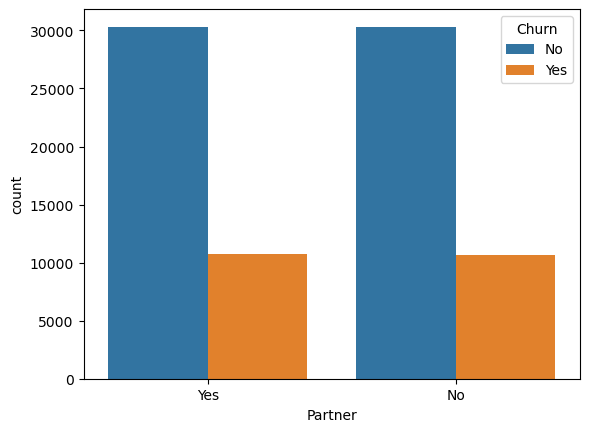

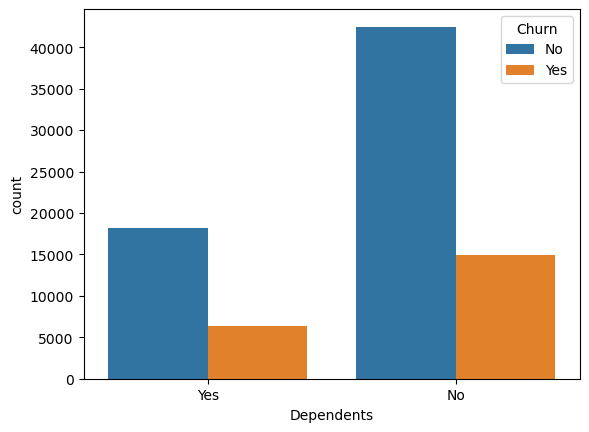

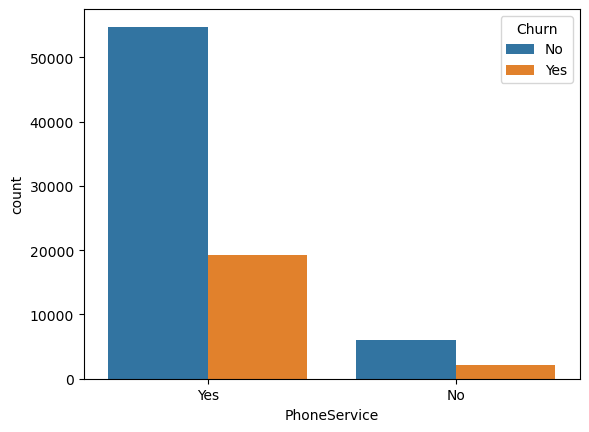

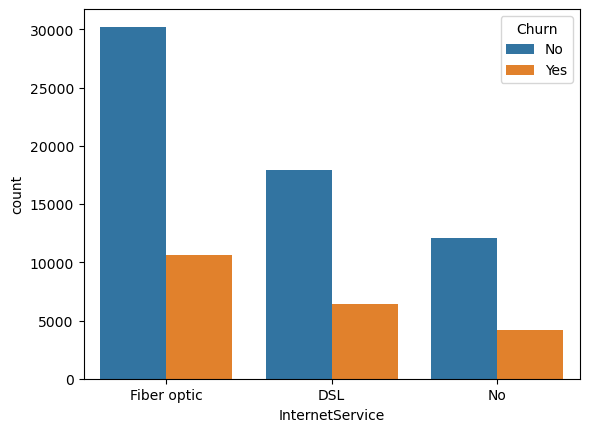

In [26]:
for feat in numeric_features:
    plt.figure()
    sns.histplot(tele_data, x=feat, hue='Churn', bins=10)
    plt.plot()

for feat in categorical_features:
    plt.figure()
    sns.countplot(tele_data, x=feat, hue='Churn')

It is visible that the churned people are way less than the not churned people making this data imbalanced.

I am going to make a new feature for SeniorCitizen that are paying high amount of monthly charges. As for most retiree it can be hard to pay higher for a service.

In [ ]:
tele_data['HighPayingSenior'] = (tele_data['SeniorCitizen'] == 1) & (tele_data['MonthlyCharges'] >= tele_data['MonthlyCharges'].quantile(0.75))

Another important feature might be if the person is Single, Couple, Married with kids. As Couples, and married people might have less intention to change their phone services.

In [41]:
tele_data['relationType'] = np.where(tele_data['Partner'] == 'No', 'Single',
                                     np.where((tele_data['Dependents'] =='No') & (tele_data['Partner'] == 'Yes'), 'Couple', 
                                              np.where(tele_data['Dependents'] == 'Yes', 'Married', np.nan)))

In [68]:
categorical_features += ['HighPayingSenior', 'relationType']

Now, we'll create our pipeline.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [69]:
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),
        ('cat', cat_pipe, categorical_features)
    ],
    remainder='drop'
)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=rf_param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [71]:
from sklearn.model_selection import train_test_split
y = tele_data['Churn'].map({"Yes": 1, "No": 0})
X = tele_data.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'InternetService',
                                                                          'HighPayingSenior',
                                                                          'relationType'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

In [72]:
print('Best RF params:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best RF params: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best score: 0.6388194430018499


In [73]:
new_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42,
                                          n_estimators=200, max_depth=None))
])

In [74]:
new_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'InternetService',
                                                   'HighPayingSenior',
                                                   'relationType'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report
y_pred = new_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80     17533
           1       0.12      0.25      0.16      2467

    accuracy                           0.68     20000
   macro avg       0.50      0.49      0.48     20000
weighted avg       0.78      0.68      0.72     20000



Applying imbalanced learning:-

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Classifiers and param grids
imb_cls_models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': [
        {'classifier__C': [0.1, 1.0, 10.0],
         'classifier__solver': ['liblinear'],
         'classifier__penalty': ['l1', 'l2']}
    ],
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5],
        'classifier__subsample': [0.8, 0.9],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    }
}

# Storage
results_clf_imb = {}
trained_models = {}

# Grid Search loop
for name, model in imb_cls_models.items():
    print(f"\nRunning {name}...")

    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=2,
        scoring='f1',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    trained_models[name] = best_model

    results_clf_imb[name] = {
        "best_params": grid.best_params_,
        'grid_obj': grid
    }

    print(f"Best Params: {grid.best_params_}")
    print(f"Best Score: {grid.best_score_}")


Running Logistic Regression...
Best Params: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Score: 0.34900472604575933

Running Random Forest...
Best Params: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.3275240902478409

Running Gradient Boosting...
Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9}
Best Score: 0.352274223614811



Evaluating Logistic Regression...
Metrics (tuned threshold 0.480): {'accuracy': 0.2626, 'f1_score': 0.41568938193343896, 'precision': 0.2623918371430001, 'recall': 0.9998094149037545, 'best_threshold': 0.48041497907788056}

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.00      0.00     14753
           1       0.26      1.00      0.42      5247

    accuracy                           0.26     20000
   macro avg       0.56      0.50      0.21     20000
weighted avg       0.70      0.26      0.11     20000



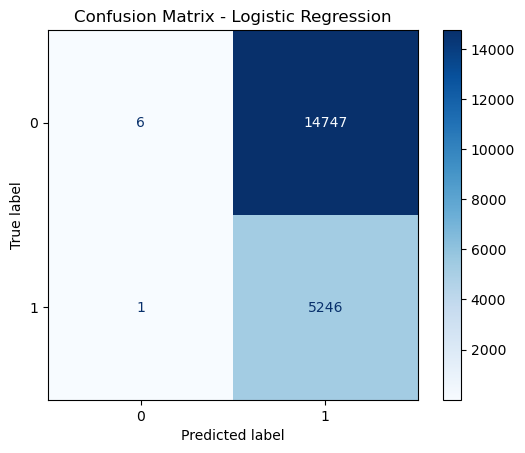


Evaluating Random Forest...
Metrics (tuned threshold 0.231): {'accuracy': 0.26235, 'f1_score': 0.41565334495187545, 'precision': 0.26235, 'recall': 1.0, 'best_threshold': 0.23107483833878606}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14753
           1       0.26      1.00      0.42      5247

    accuracy                           0.26     20000
   macro avg       0.13      0.50      0.21     20000
weighted avg       0.07      0.26      0.11     20000



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


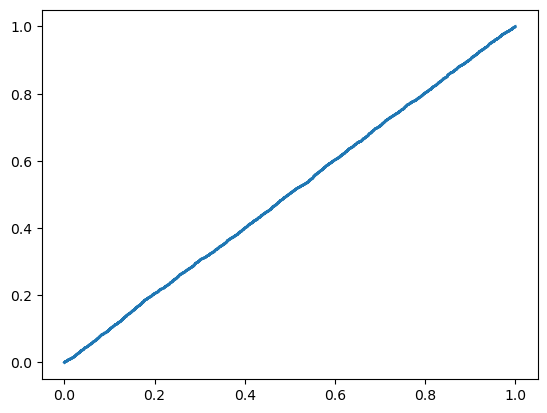

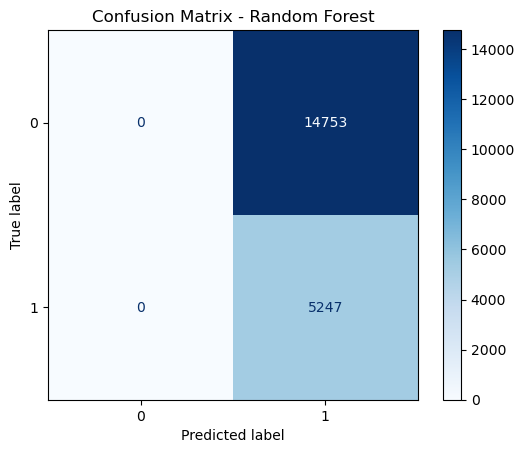


Evaluating Gradient Boosting...
Metrics (tuned threshold 0.398): {'accuracy': 0.2627, 'f1_score': 0.4157686212361331, 'precision': 0.26244185464912717, 'recall': 1.0, 'best_threshold': 0.398478862929661}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14753
           1       0.26      1.00      0.42      5247

    accuracy                           0.26     20000
   macro avg       0.63      0.50      0.21     20000
weighted avg       0.81      0.26      0.11     20000



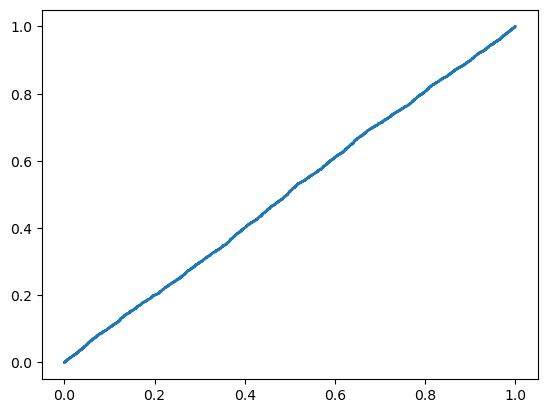

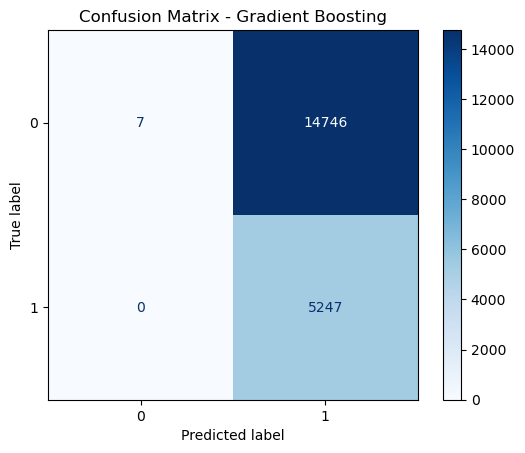

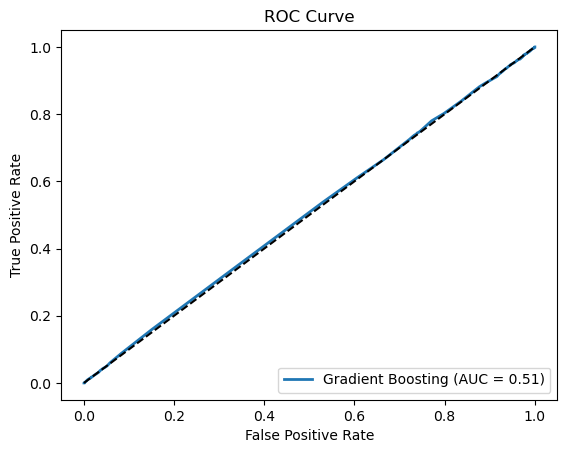

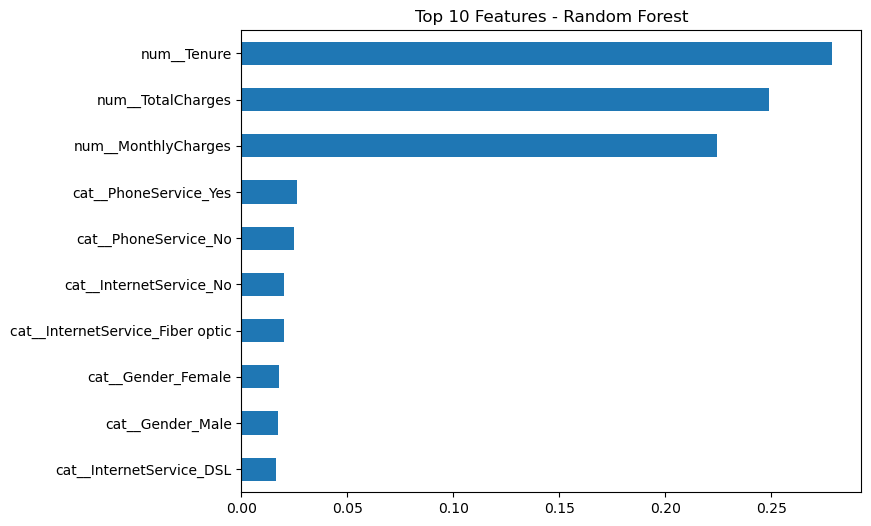

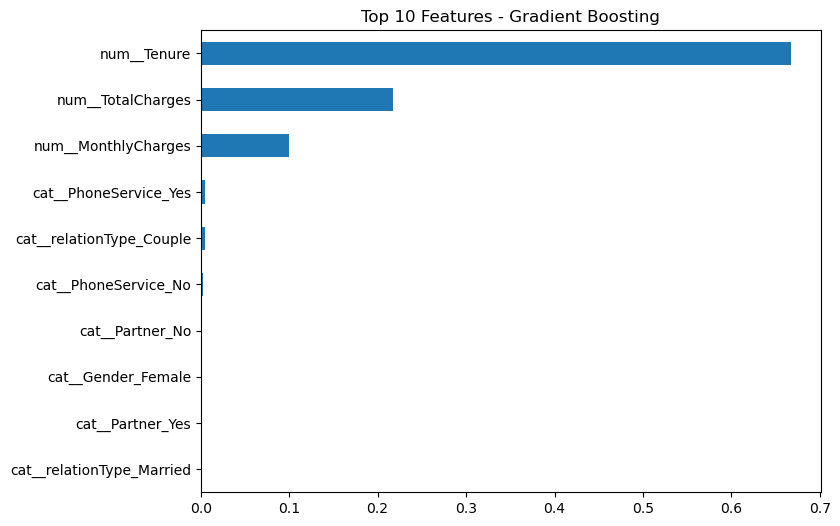

In [78]:
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, precision_recall_curve, accuracy_score, f1_score,
                             precision_score, recall_score)


for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")

    y_prob = model.predict_proba(X_test)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_test, y_prob)
    f1_vals = 2 * prec * rec / (prec + rec + 1e-10)
    best_idx = np.argmax(f1_vals)
    best_thresh = thresh[best_idx]
    y_pred_thresh = (y_prob >= best_thresh).astype(int)

    # Metrics
    metrics_tuned = {
        "accuracy": accuracy_score(y_test, y_pred_thresh),
        "f1_score": f1_score(y_test, y_pred_thresh),
        "precision": precision_score(y_test, y_pred_thresh),
        "recall": recall_score(y_test, y_pred_thresh),
        "best_threshold": best_thresh
    }
    print(f"Metrics (tuned threshold {best_thresh:.3f}): {metrics_tuned}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_thresh))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature importance for tree-based models
for tree_name in ['Random Forest', 'Gradient Boosting']:
    if tree_name in trained_models:
        best_tree = trained_models[tree_name]
        clf = best_tree.named_steps["classifier"]
        feature_names = best_tree.named_steps["preprocessor"].get_feature_names_out()
        importances = clf.feature_importances_
        feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

        plt.figure(figsize=(8,6))
        feat_imp.plot(kind="barh")
        plt.title(f"Top 10 Features - {tree_name}")
        plt.gca().invert_yaxis()
        plt.show()
